# Titanic - Machine Learning from Disaster

## Define the problem

**Project Summary**: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Prepare data

### Import libraries

In [1]:
import sys 
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook

print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.16.5
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.23.2


### Meet and greet data

In [2]:
train_data = pd.read_csv("./Data/train.csv")
test_data = pd.read_csv("./Data/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data_cleaner = [train_data, test_data]

In [10]:
for df in data_cleaner:
    print(df.isnull().sum())
    print("-"*20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------


In [11]:
for df in data_cleaner:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df['Age'].fillna(df['Fare'].mean(), inplace=True)

In [12]:
for df in data_cleaner:
    print(df.isnull().sum())
    print('-'*20)    

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
--------------------


In [13]:
for col in train_data:
    if train_data[col].dtype != 'float64' and col not in ['Survived', 'Name']:
        print('Survival correlation by: ', col)
        print(pd.pivot_table(train_data, values=['Survived'], index=[col], aggfunc={'Survived': np.mean}))
        # print(train_data[[col, 'Survived']].groupby(col, as_index=False).mean())
        print('-'*20)

Survival correlation by:  PassengerId
             Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0
...               ...
887                 0
888                 1
889                 0
890                 1
891                 0

[891 rows x 1 columns]
--------------------
Survival correlation by:  Pclass
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
--------------------
Survival correlation by:  Sex
        Survived
Sex             
female  0.742038
male    0.188908
--------------------
Survival correlation by:  SibSp
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
--------------------
Survival correlation by:  Parch
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


[Text(0, 0.5, 'Number of parents'), Text(0.5, 1.0, 'Parch boxplot')]

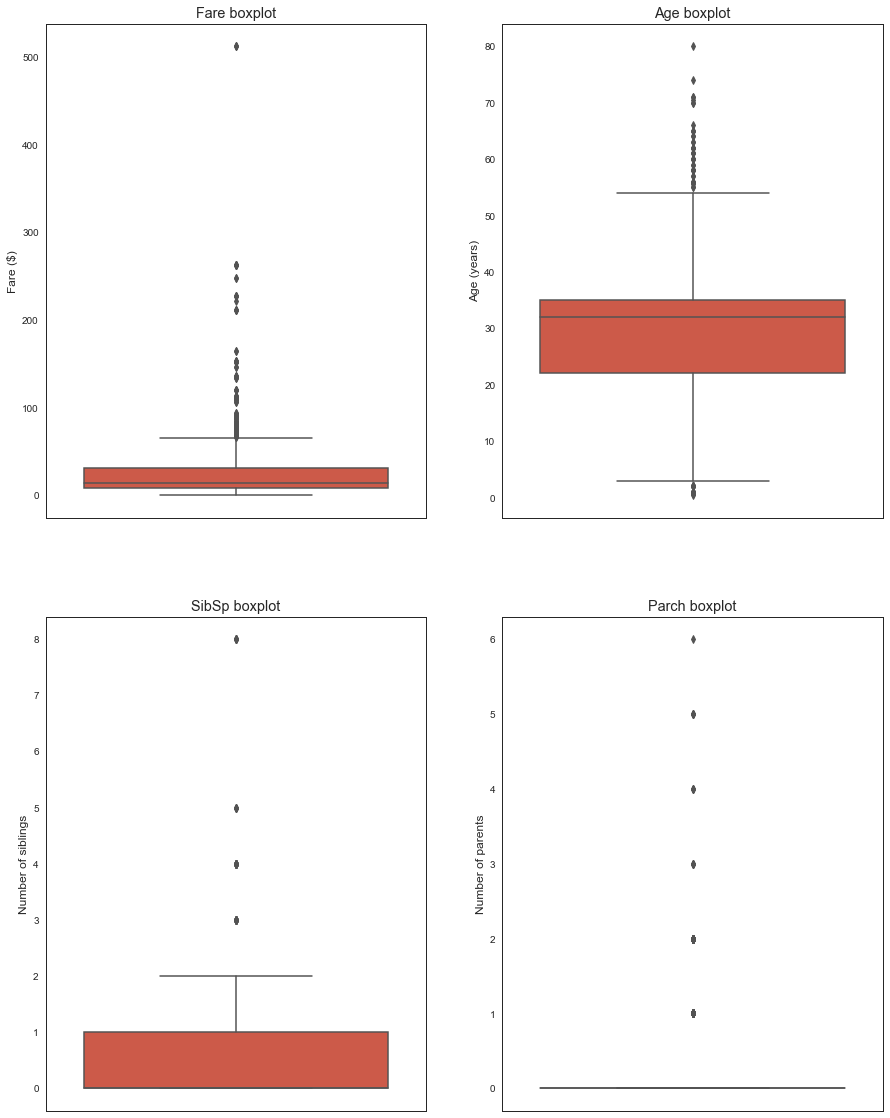

In [14]:
# plt.figure(figsize=[20,16])

fig, axs = plt.subplots(2, 2, figsize=[15, 20])

sns.boxplot(x=train_data['Fare'], ax=axs[0, 0], orient='v').set(ylabel='Fare ($)', title='Fare boxplot')
sns.boxplot(x=train_data['Age'], ax=axs[0, 1], orient='v').set(ylabel='Age (years)', title='Age boxplot')
sns.boxplot(x=train_data['SibSp'], ax=axs[1, 0], orient='v').set(ylabel='Number of siblings', title='SibSp boxplot')
sns.boxplot(x=train_data['Parch'], ax=axs[1, 1], orient='v').set(ylabel='Number of parents', title='Parch boxplot')

([array([233.,  65.,   0.,  40.,   0.,   3.,   0.,   0.,   1.,   0.]),
  array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.])],
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 2 Lists of Patches objects>)

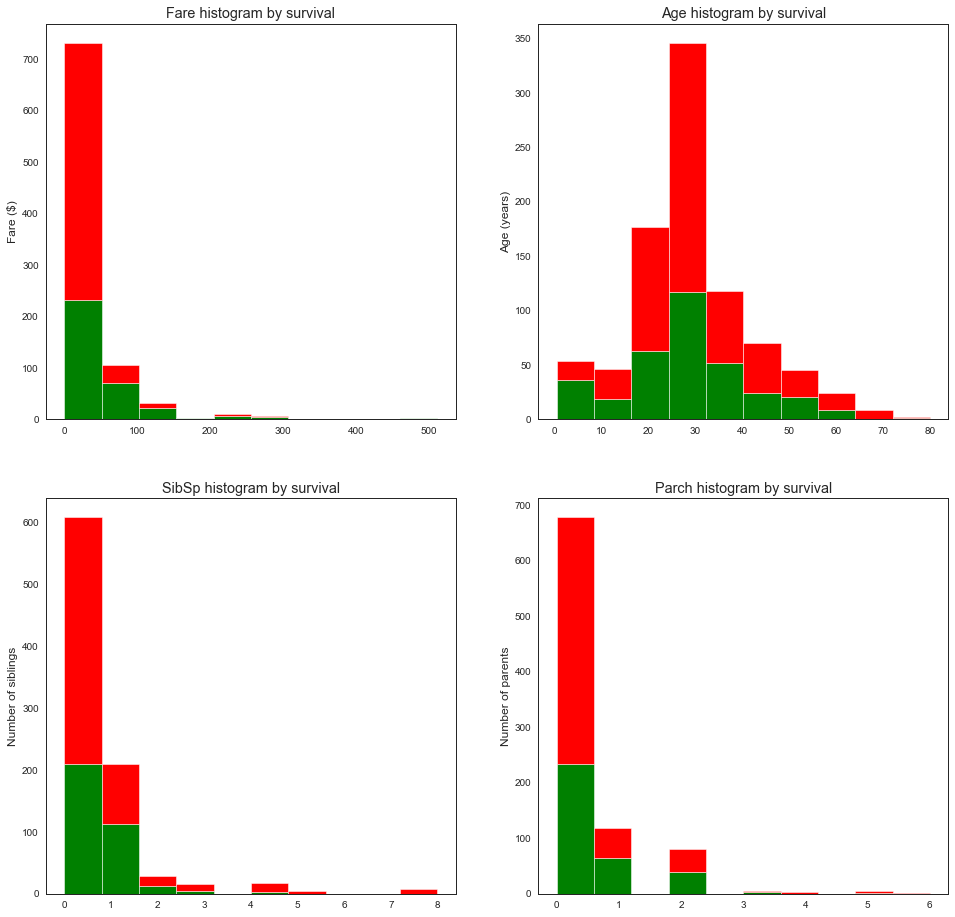

In [15]:
plt.figure(figsize=[25, 16])

plt.subplot(231)
plt.title('Fare histogram by survival')
plt.ylabel('Fare ($)')
plt.hist([train_data[train_data['Survived'] == 1]['Fare'], train_data[train_data['Survived'] == 0]['Fare']], color=['g', 'r'], stacked=True)

plt.subplot(232)
plt.title('Age histogram by survival')
plt.ylabel('Age (years)')
plt.hist(x=[train_data[train_data['Survived'] == 1]['Age'], train_data[train_data['Survived'] == 0]['Age']], color=['g', 'r'], stacked=True)

plt.subplot(234)
plt.title('SibSp histogram by survival')
plt.ylabel('Number of siblings')
plt.hist(x=[train_data[train_data['Survived'] == 1]['SibSp'], train_data[train_data['Survived'] == 0]['SibSp']], color=['g', 'r'], stacked=True)

plt.subplot(235)
plt.title('Parch histogram by survival')
plt.ylabel('Number of parents')
plt.hist(x=[train_data[train_data['Survived'] == 1]['Parch'], train_data[train_data['Survived'] == 0]['Parch']], color=['g', 'r'], stacked=True)

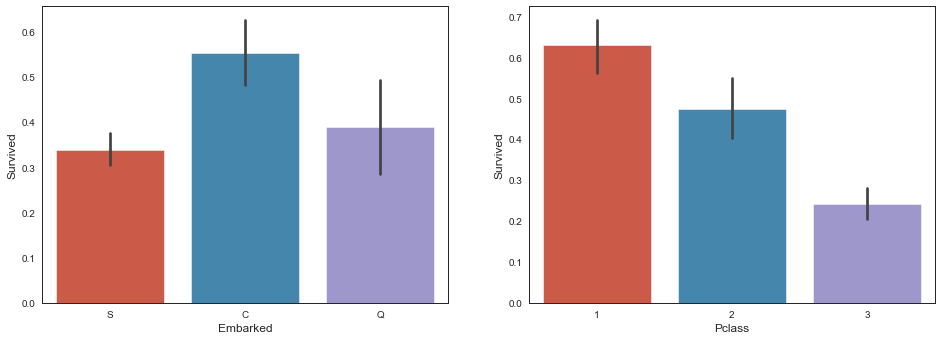

In [16]:
plt.figure(figsize=[16, 12])

plt.subplot(221)
sns.barplot(x = 'Embarked', y = 'Survived', data=train_data)

plt.subplot(222)
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=train_data)
# sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=train_data, ax = saxis[0,2])

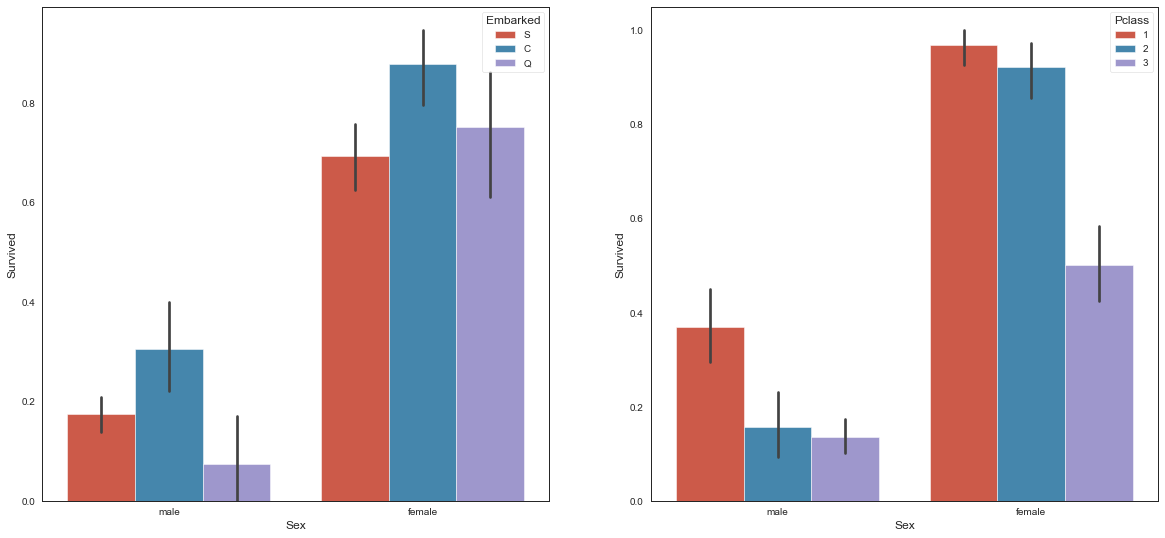

In [17]:
plt.figure(figsize=[20, 20])

plt.subplot(221)
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=train_data)

plt.subplot(222)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

In [18]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
for df in data_cleaner:
    df['Family'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = 1
    df['IsAlone'].loc[df['Family'] > 0] = 0
    df['NameTitle'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [20]:
train_data['NameTitle'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Sir               1
Jonkheer          1
Lady              1
Mme               1
Don               1
the Countess      1
Capt              1
Ms                1
Name: NameTitle, dtype: int64

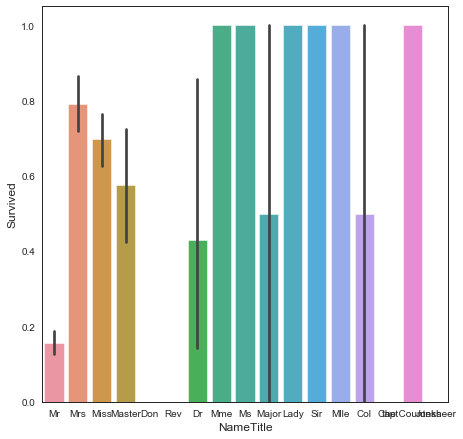

In [21]:
plt.figure(figsize=[16, 16])

plt.subplot(221)
sns.barplot(x='NameTitle', y='Survived', data=train_data)

Text(0, 0.5, 'Family members on board')

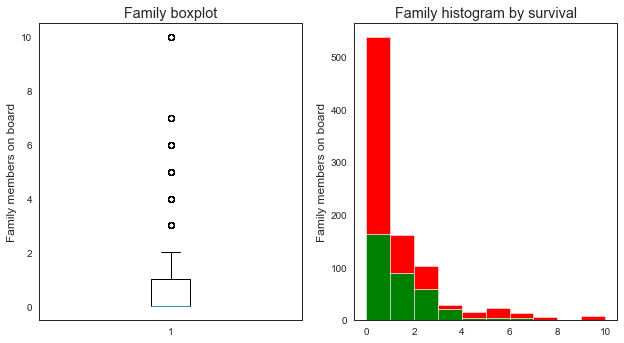

In [22]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=train_data['Family'])
plt.title('Family boxplot')
plt.ylabel('Family members on board')

plt.subplot(232)
plt.hist(x=[train_data[train_data['Survived'] == 1]['Family'], train_data[train_data['Survived'] == 0]['Family']], color=['g', 'r'], stacked=True)
plt.title('Family histogram by survival')
plt.ylabel('Family members on board')

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Family         891 non-null int64
IsAlone        891 non-null int64
NameTitle      891 non-null object
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

drop_cols = ['Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch', 'NameTitle', 'Embarked', 'Cabin', 'Sex']
dummies_cols = ['NameTitle', 'Embarked']

for df in data_cleaner:
    df['Fare'] = np.log(df['Fare'] + 1)
    df['Sex_code'] = label_encoder.fit_transform(df['Sex'])

train_data['train'] = 1
test_data['train'] = 0
test_data['Survived'] = np.nan
all_data = pd.concat([train_data, test_data], ignore_index=True)

all_data = all_data.join(pd.get_dummies(all_data[dummies_cols]))

all_data.drop(drop_cols, axis=1, inplace=True)

all_data_scaled = all_data.copy()
all_data_scaled[['Age','Family','Fare']]= scaler.fit_transform(all_data_scaled[['Age','Family','Fare']])

y_train = all_data[all_data['train']==1].Survived

X_train_scaled = all_data_scaled[all_data_scaled['train'] == 1].drop(['train', 'Survived'], axis=1)
X_test_scaled = all_data_scaled[all_data_scaled['train'] == 0].drop(['train', 'Survived'], axis=1)
X_train = all_data[all_data['train'] == 1].drop(['train', 'Survived'], axis=1)
X_test = all_data[all_data['train'] == 0].drop(['train', 'Survived'], axis=1)

Text(0.5, 1.0, 'Normalized fare distribution')

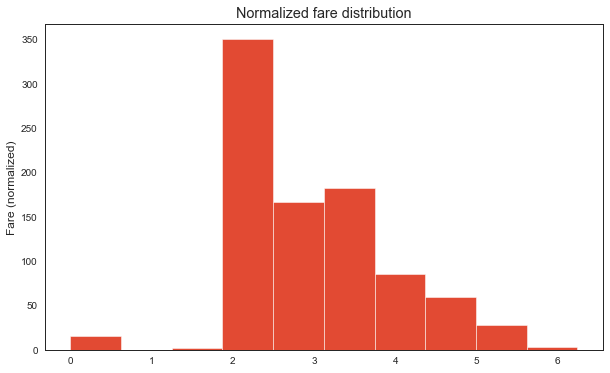

In [25]:
plt.figure(figsize=[10, 6])

plt.hist(x=train_data['Fare'])
plt.ylabel('Fare (normalized)')
plt.title('Normalized fare distribution')

In [26]:
X_train.head()

,Age,Family,Fare,IsAlone,Pclass,Sex_code,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,...,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,2.110213,0,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,1,4.280593,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,26.0,0,2.188856,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,1,3.990834,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,35.0,0,2.202765,1,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 27 columns):
Age                       891 non-null float64
Family                    891 non-null int64
Fare                      891 non-null float64
IsAlone                   891 non-null int64
Pclass                    891 non-null int64
Sex_code                  891 non-null int32
NameTitle_Capt            891 non-null uint8
NameTitle_Col             891 non-null uint8
NameTitle_Don             891 non-null uint8
NameTitle_Dona            891 non-null uint8
NameTitle_Dr              891 non-null uint8
NameTitle_Jonkheer        891 non-null uint8
NameTitle_Lady            891 non-null uint8
NameTitle_Major           891 non-null uint8
NameTitle_Master          891 non-null uint8
NameTitle_Miss            891 non-null uint8
NameTitle_Mlle            891 non-null uint8
NameTitle_Mme             891 non-null uint8
NameTitle_Mr              891 non-null uint8
NameTitle_Mrs             891 non-nu

In [28]:
X_test.head()

,Age,Family,Fare,IsAlone,Pclass,Sex_code,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,...,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,Embarked_C,Embarked_Q,Embarked_S
891,34.5,0,2.178064,1,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
892,47.0,1,2.079442,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
893,62.0,0,2.369075,1,2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
894,27.0,0,2.268252,1,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
895,22.0,2,2.586824,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 27 columns):
Age                       418 non-null float64
Family                    418 non-null int64
Fare                      418 non-null float64
IsAlone                   418 non-null int64
Pclass                    418 non-null int64
Sex_code                  418 non-null int32
NameTitle_Capt            418 non-null uint8
NameTitle_Col             418 non-null uint8
NameTitle_Don             418 non-null uint8
NameTitle_Dona            418 non-null uint8
NameTitle_Dr              418 non-null uint8
NameTitle_Jonkheer        418 non-null uint8
NameTitle_Lady            418 non-null uint8
NameTitle_Major           418 non-null uint8
NameTitle_Master          418 non-null uint8
NameTitle_Miss            418 non-null uint8
NameTitle_Mlle            418 non-null uint8
NameTitle_Mme             418 non-null uint8
NameTitle_Mr              418 non-null uint8
NameTitle_Mrs             418 non

In [30]:
X_train_scaled.head()

,Age,Family,Fare,IsAlone,Pclass,Sex_code,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,...,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,Embarked_C,Embarked_Q,Embarked_S
0,-0.660872,0.073352,-0.898347,0,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.572563,0.073352,1.343595,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,-0.352513,-0.558346,-0.817111,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.341294,0.073352,1.044282,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.341294,-0.558346,-0.802744,1,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [31]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 27 columns):
Age                       891 non-null float64
Family                    891 non-null float64
Fare                      891 non-null float64
IsAlone                   891 non-null int64
Pclass                    891 non-null int64
Sex_code                  891 non-null int32
NameTitle_Capt            891 non-null uint8
NameTitle_Col             891 non-null uint8
NameTitle_Don             891 non-null uint8
NameTitle_Dona            891 non-null uint8
NameTitle_Dr              891 non-null uint8
NameTitle_Jonkheer        891 non-null uint8
NameTitle_Lady            891 non-null uint8
NameTitle_Major           891 non-null uint8
NameTitle_Master          891 non-null uint8
NameTitle_Miss            891 non-null uint8
NameTitle_Mlle            891 non-null uint8
NameTitle_Mme             891 non-null uint8
NameTitle_Mr              891 non-null uint8
NameTitle_Mrs             891 non-

In [32]:
X_test_scaled.head()

,Age,Family,Fare,IsAlone,Pclass,Sex_code,NameTitle_Capt,NameTitle_Col,NameTitle_Don,NameTitle_Dona,...,NameTitle_Mme,NameTitle_Mr,NameTitle_Mrs,NameTitle_Ms,NameTitle_Rev,NameTitle_Sir,NameTitle_the Countess,Embarked_C,Embarked_Q,Embarked_S
891,0.302749,-0.558346,-0.828259,1,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
892,1.266370,0.073352,-0.930133,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
893,2.422714,-0.558346,-0.630950,1,2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
894,-0.275423,-0.558346,-0.735097,1,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
895,-0.660872,0.705051,-0.406022,0,3,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [33]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 27 columns):
Age                       418 non-null float64
Family                    418 non-null float64
Fare                      418 non-null float64
IsAlone                   418 non-null int64
Pclass                    418 non-null int64
Sex_code                  418 non-null int32
NameTitle_Capt            418 non-null uint8
NameTitle_Col             418 non-null uint8
NameTitle_Don             418 non-null uint8
NameTitle_Dona            418 non-null uint8
NameTitle_Dr              418 non-null uint8
NameTitle_Jonkheer        418 non-null uint8
NameTitle_Lady            418 non-null uint8
NameTitle_Major           418 non-null uint8
NameTitle_Master          418 non-null uint8
NameTitle_Miss            418 non-null uint8
NameTitle_Mlle            418 non-null uint8
NameTitle_Mme             418 non-null uint8
NameTitle_Mr              418 non-null uint8
NameTitle_Mrs             418 n

In [34]:
print('Train data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)
print('Train y shape: ', y_train.shape)

Train data shape:  (891, 27)
Test data shape:  (418, 27)
Train y shape:  (891,)


In [35]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':7 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

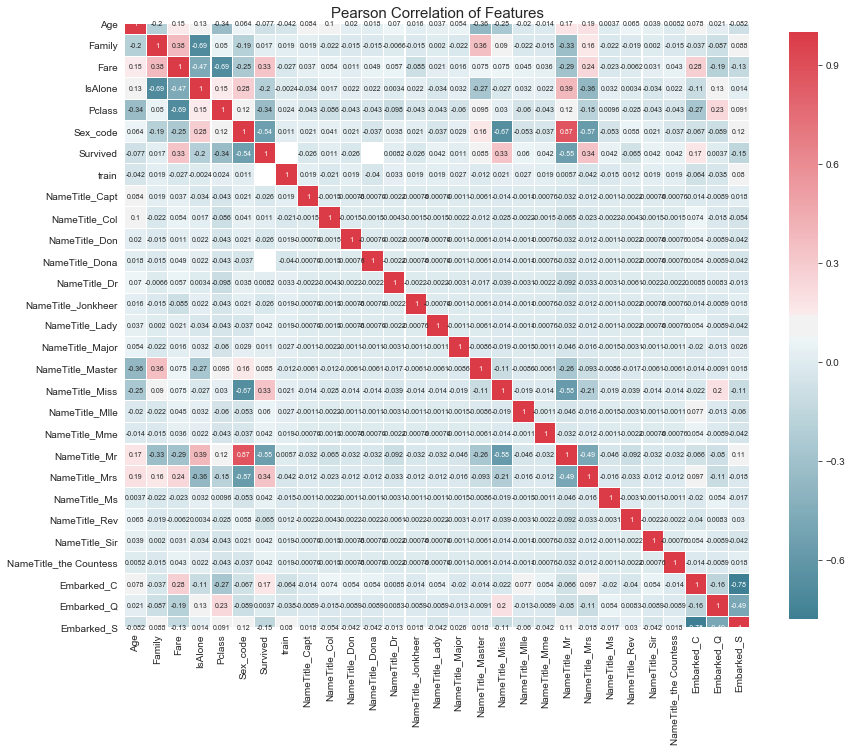

In [36]:
correlation_heatmap(all_data_scaled)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61452514 0.61235955 0.78089888 0.76404494 0.61797753]
0.6779612077082418


In [39]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.80898876 0.80898876 0.86516854]
0.8237963718536188


In [40]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82122905 0.81460674 0.80898876 0.80898876 0.86516854]
0.8237963718536188


In [41]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.77094972 0.75280899 0.80898876 0.74719101 0.75842697]
0.7676730902014939


In [42]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.75280899 0.80898876 0.74719101 0.74719101]
0.7676605360617664


In [43]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75418994 0.79213483 0.76404494 0.80898876 0.80898876]
0.7856694495009731


In [44]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.79213483 0.85955056 0.8258427  0.8258427 ]
0.8170987383089574


In [45]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.78651685 0.83707865 0.7752809  0.8258427 ]
0.8013684012303056


In [46]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7877095  0.78651685 0.83707865 0.7752809  0.81460674]
0.8002385286548239


In [47]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.84357542 0.82022472 0.82022472 0.80337079 0.86516854]
0.8305128366078713


In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81564246 0.80898876 0.85955056 0.79213483 0.80337079]
0.8159374803841566


In [49]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [50]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83798883 0.82022472 0.8258427  0.80898876 0.86516854]
0.8316427091833531


In [51]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('./Data/base_submission.csv', index=False)

In [52]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [53]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [54]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s


Logistic Regression
Best Score: 0.8271671583704727
Best Parameters: {'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    4.3s finished


In [55]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    0.5s


KNN
Best Score: 0.8226916075575922
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.0s finished


In [56]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  2.0min finished


SVC
Best Score: 0.8316301550436256
Best Parameters: {'C': 10, 'degree': 2, 'kernel': 'poly'}


In [57]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 
"""
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')"""

"\nrf = RandomForestClassifier(random_state = 1)\nparam_grid =  {'n_estimators': [100,500,1000], \n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n                                  \nclf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)\nclf_performance(best_clf_rf_rnd,'Random Forest')"

In [58]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  4.0min finished


Random Forest
Best Score: 0.8361496453455526
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}


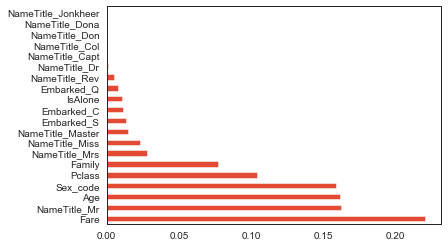

In [59]:
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [60]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  3.3min finished


XGB
Best Score: 0.8496076831335133
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


In [61]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('./Data/xgb_submission3.csv', index=False)

In [62]:
best_lr = best_clf_lr.best_estimator_
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_rf = best_clf_rf.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_all :',cross_val_score(voting_clf_all,X_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,X_train,y_train,cv=5).mean())

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())

voting_clf_hard : [0.81005587 0.81460674 0.83146067 0.80898876 0.8258427 ]
voting_clf_hard mean : 0.8181909484652564
voting_clf_soft : [0.82122905 0.81460674 0.81460674 0.80898876 0.84269663]
voting_clf_soft mean : 0.8204255853367648
voting_clf_all : [0.82122905 0.82022472 0.82022472 0.80337079 0.85955056]
voting_clf_all mean : 0.8249199673592369
voting_clf_xgb : [0.82681564 0.8258427  0.83146067 0.80337079 0.85955056]
voting_clf_xgb mean : 0.8294080723118448


In [63]:
#in a soft voting classifier you can weight some models more than others. I used a grid search to explore different weightings
#no new results here
params = {'weights' : [[1,1,1],[1,2,1],[1,1,2],[2,1,1],[2,2,1],[1,2,2],[2,1,2]]}

vote_weight = GridSearchCV(voting_clf_soft, param_grid = params, cv = 5, verbose = True, n_jobs = -1)
best_clf_weight = vote_weight.fit(X_train_scaled,y_train)
clf_performance(best_clf_weight,'VC Weights')
voting_clf_sub = best_clf_weight.best_estimator_.predict(X_test_scaled)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    8.2s finished


VC Weights
Best Score: 0.8372418555018516
Best Parameters: {'weights': [1, 2, 2]}


In [64]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [65]:
#convert output to dataframe 
final_data = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_5 = {'PassengerId': test_data.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': test_data.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [66]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [67]:
comparison.difference_hard_all.value_counts()

0    407
1     11
Name: difference_hard_all, dtype: int64

In [68]:
#prepare submission files 
submission.to_csv('./Data/submission_rf.csv', index =False)
submission_2.to_csv('./Data/submission_vc_hard.csv',index=False)
submission_3.to_csv('./Data/submission_vc_soft.csv', index=False)
submission_4.to_csv('./Data/submission_vc_all.csv', index=False)
submission_5.to_csv('./Data/submission_vc_xgb2.csv', index=False)